# Data

In [1]:
import shutil
from google.colab import files

# Ruta de la carpeta que quieres comprimir
folder_to_zip = '/content/runs/detect/train'
output_filename = '/content/train_folder.zip'

# Comprimir la carpeta en un archivo ZIP
shutil.make_archive(output_filename.replace('.zip', ''), 'zip', folder_to_zip)

# Descargar el archivo comprimido
files.download(output_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
import gdown
import zipfile
import os

import numpy as np
import pandas as pd

import cv2
import matplotlib.pyplot as plt

!pip install ultralytics
from ultralytics import YOLO

import random
random.seed(123)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.0/883.0 kB 6.7 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [5]:
ls

0000076_00352_d_0000002.jpg  0000172_01484_d_0000001.jpg      sample_data/
0000142_03658_d_0000041.jpg  model_filtered_20241006_1500.pt


# Cargar el modelo y predecir

In [16]:
def predict_and_display(model_path, image_paths):
  """Loads a YOLO model, predicts classes, and displays results with bounding boxes.

  Args:
    model_path: Path to the YOLO model.
    image_paths: List of paths to the images.
  """
  model = YOLO(model_path)  # Load the model

  for image_path in image_paths:
    results = model.predict(source=image_path)  # Predict on the image
    result = results[0]  # Get the first result

    # Print the detected classes and bounding boxes
    print(f"Image: {image_path}")
    for box in result.boxes:
      class_id = result.names[int(box.cls[0])]
      confidence = round(box.conf[0].item(), 2)
      bounding_box = [int(x) for x in box.xyxy[0]]
      print(f"- Class: {class_id}, Confidence: {confidence}, Bounding Box: {bounding_box}")

    # Display the image with bounding boxes using OpenCV
    img = cv2.imread(image_path)
    for box in result.boxes:
      bounding_box = [int(x) for x in box.xyxy[0]]
      cv2.rectangle(img, (bounding_box[0], bounding_box[1]), (bounding_box[2], bounding_box[3]), (0, 255, 0), 2)  # Draw green rectangle
      cv2.putText(img, f"{result.names[int(box.cls[0])]} {round(box.conf[0].item(), 2)}", (bounding_box[0], bounding_box[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert to RGB before showing
    plt.show()


image 1/1 /content/0000172_01484_d_0000001.jpg: 384x640 2 cars, 1 truck, 997.7ms
Speed: 3.3ms preprocess, 997.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)
Image: /content/0000172_01484_d_0000001.jpg
- Class: car, Confidence: 0.66, Bounding Box: [368, 455, 447, 518]
- Class: car, Confidence: 0.34, Bounding Box: [494, 407, 533, 448]
- Class: truck, Confidence: 0.26, Bounding Box: [384, 397, 461, 443]


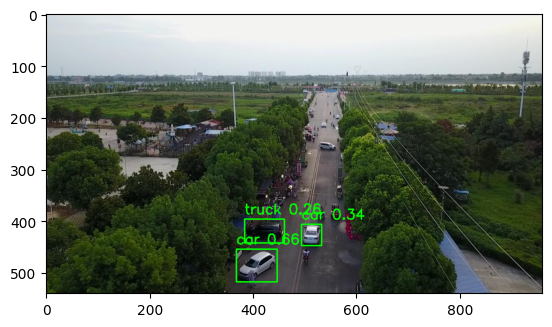


image 1/1 /content/0000076_00352_d_0000002.jpg: 384x640 4 cars, 3 trucks, 1 motor, 2513.7ms
Speed: 7.2ms preprocess, 2513.7ms inference, 5.1ms postprocess per image at shape (1, 3, 384, 640)
Image: /content/0000076_00352_d_0000002.jpg
- Class: car, Confidence: 0.77, Bounding Box: [604, 242, 903, 414]
- Class: car, Confidence: 0.72, Bounding Box: [0, 356, 113, 547]
- Class: car, Confidence: 0.71, Bounding Box: [173, 179, 451, 321]
- Class: car, Confidence: 0.69, Bounding Box: [0, 148, 77, 272]
- Class: truck, Confidence: 0.67, Bounding Box: [853, 53, 1103, 222]
- Class: truck, Confidence: 0.66, Bounding Box: [274, 229, 786, 576]
- Class: motor, Confidence: 0.31, Bounding Box: [517, 59, 566, 110]
- Class: truck, Confidence: 0.27, Bounding Box: [1032, 350, 1360, 717]


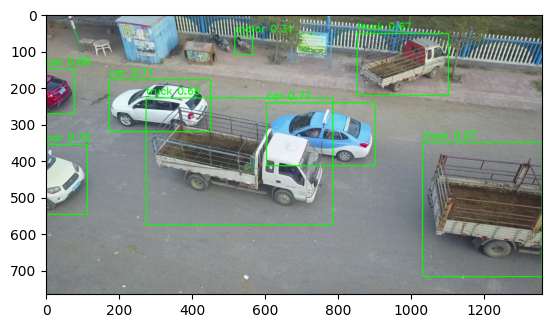


image 1/1 /content/0000142_03658_d_0000041.jpg: 384x640 16 cars, 3 vans, 3 buss, 1390.7ms
Speed: 4.2ms preprocess, 1390.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)
Image: /content/0000142_03658_d_0000041.jpg
- Class: car, Confidence: 0.94, Bounding Box: [1056, 573, 1169, 658]
- Class: car, Confidence: 0.88, Bounding Box: [1148, 651, 1294, 757]
- Class: car, Confidence: 0.87, Bounding Box: [985, 587, 1081, 662]
- Class: car, Confidence: 0.81, Bounding Box: [1419, 777, 1575, 888]
- Class: car, Confidence: 0.8, Bounding Box: [924, 532, 1006, 590]
- Class: car, Confidence: 0.8, Bounding Box: [1065, 659, 1188, 762]
- Class: car, Confidence: 0.79, Bounding Box: [1008, 520, 1088, 588]
- Class: car, Confidence: 0.78, Bounding Box: [1148, 741, 1292, 863]
- Class: car, Confidence: 0.7, Bounding Box: [1302, 677, 1436, 775]
- Class: car, Confidence: 0.7, Bounding Box: [1076, 525, 1177, 593]
- Class: car, Confidence: 0.68, Bounding Box: [1180, 606, 1298, 688]
- Class: bus,

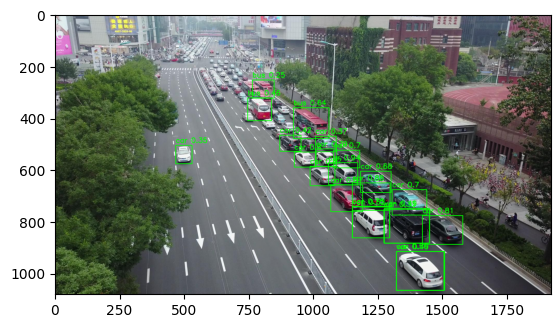

In [23]:
model_path = '/content/model_filtered_20241006_1500.pt'
image_paths = ['/content/0000172_01484_d_0000001.jpg','/content/0000076_00352_d_0000002.jpg','/content/0000142_03658_d_0000041.jpg']

predict_and_display(model_path, image_paths)

---

# Visualizacion de capas inferiores

In [53]:
model = YOLO(model_path)

## 1. Arquitectura

In [47]:
model.model.model

Sequential(
  (0): Conv(
    (conv): Conv2d(3, 48, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(48, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
    (act): SiLU(inplace=True)
  )
  (1): Conv(
    (conv): Conv2d(48, 96, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(96, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
    (act): SiLU(inplace=True)
  )
  (2): C2f(
    (cv1): Conv(
      (conv): Conv2d(96, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(96, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (cv2): Conv(
      (conv): Conv2d(192, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(96, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (m): ModuleList(
      (0-1): 2 x Bottleneck(
        (cv1): Conv(
 

## 2. Convertir mapas de características en imágenes

In [ ]:
import torch
import matplotlib.pyplot as plt
from ultralytics import YOLO
from torchvision.transforms import ToTensor
from PIL import Image

In [62]:
# Función para cargar la imagen y convertirla en tensor
def load_image_as_tensor(image_path):
    # Cargar la imagen
    img = Image.open(image_path).convert('RGB')

    # Redimensionar la imagen a 640x640 (o a un tamaño compatible)
    resize_transform = transforms.Resize((640, 640))
    img_resized = resize_transform(img)

    # Convertir a tensor y normalizar
    tensor_transform = transforms.ToTensor()
    img_tensor = tensor_transform(img_resized).unsqueeze(0)  # Agregar batch dimension (B, C, H, W)

    return img_tensor

# Función para visualizar los feature maps
def visualize_feature_maps(model, layer_ids, image_tensor):
    # Diccionario para almacenar las salidas de cada capa
    feature_maps = {}

    # Definir hooks para las capas específicas
    def get_hook(layer_id):
        def hook(module, input, output):
            feature_maps[layer_id] = output
        return hook

    # Registrar los hooks para las capas especificadas
    hooks = []
    for layer_id in layer_ids:
        hook = model.model.model[layer_id].register_forward_hook(get_hook(layer_id))
        hooks.append(hook)

    # Hacer una pasada hacia adelante con el tensor de la imagen
    with torch.no_grad():
        _ = model(image_tensor)  # Forward pass

    # Desregistrar los hooks
    for hook in hooks:
        hook.remove()

    # Visualizar los feature maps
    for layer_id in layer_ids:
        fmap = feature_maps[layer_id].squeeze(0)  # Eliminar la dimensión del batch
        num_features = fmap.size(0)  # Número de canales

        # Mostrar algunos canales (por ejemplo, los primeros 8 feature maps)
        fig, axes = plt.subplots(2, 4, figsize=(12, 6))
        axes = axes.flatten()
        for i in range(8):
            if i < num_features:  # Por si hay menos de 8 canales
                axes[i].imshow(fmap[i].cpu(), cmap='viridis')
                axes[i].axis('off')
        plt.suptitle(f'Feature Maps of Layer {layer_id}')
        plt.show()


0: 640x640 18 cars, 3 vans, 1 truck, 4 buss, 1755.7ms
Speed: 0.1ms preprocess, 1755.7ms inference, 8.1ms postprocess per image at shape (1, 3, 640, 640)


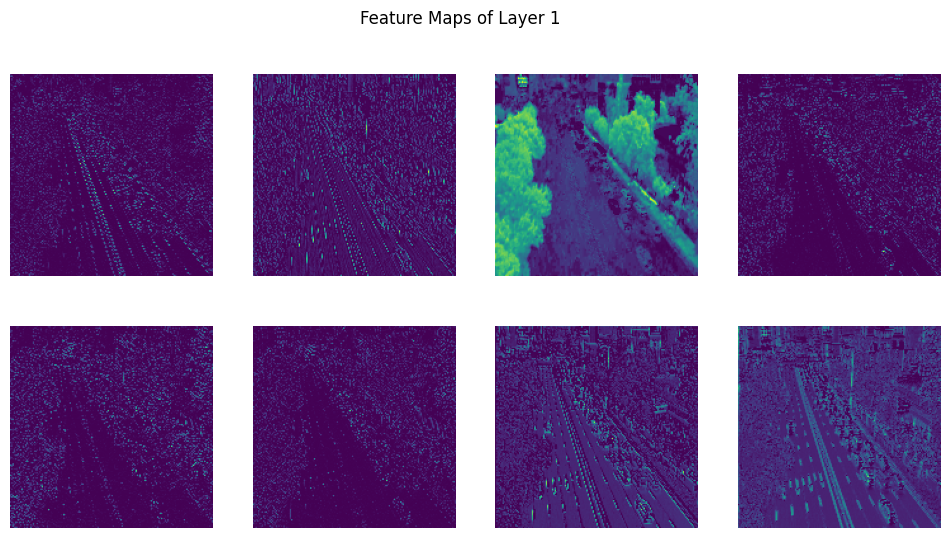

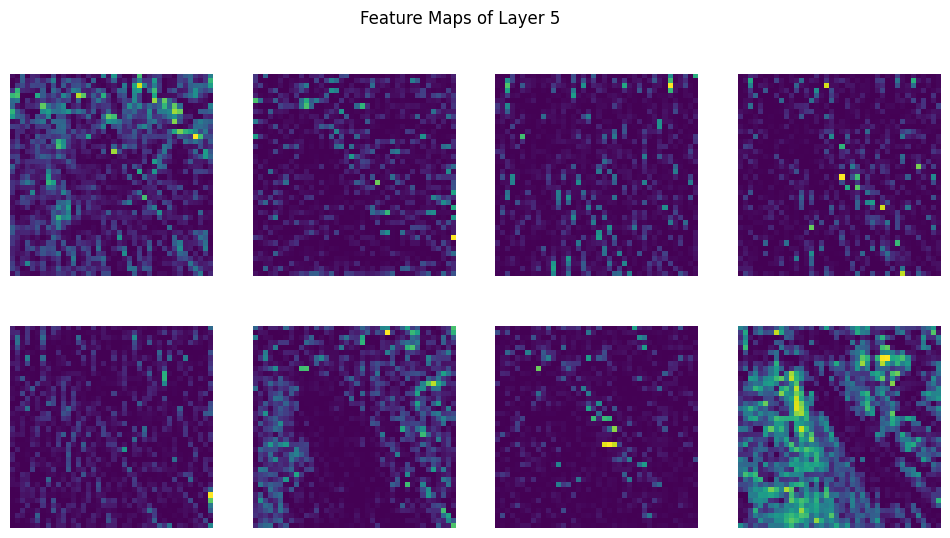

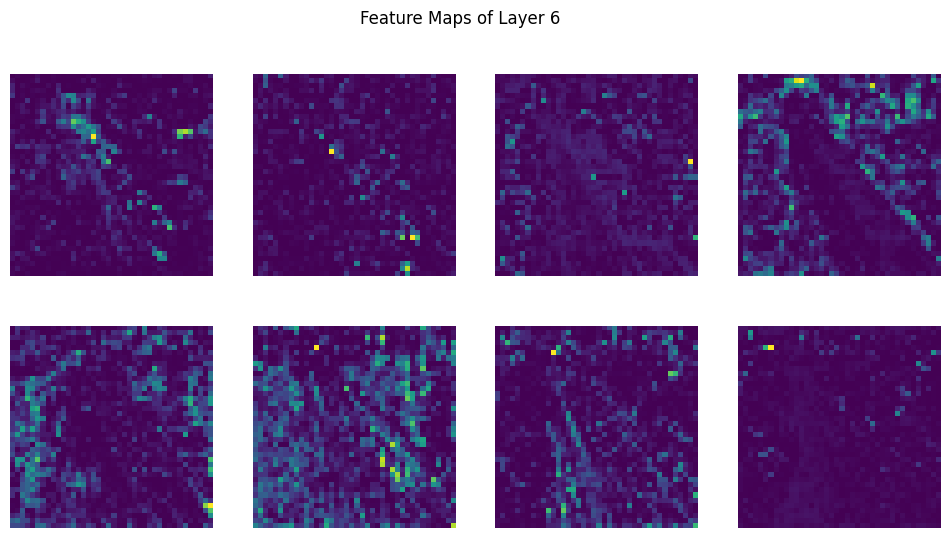

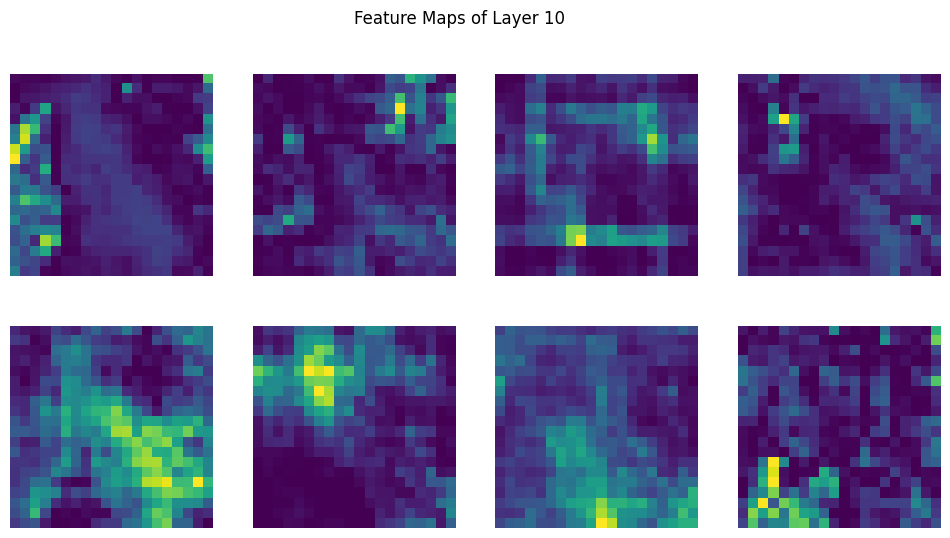

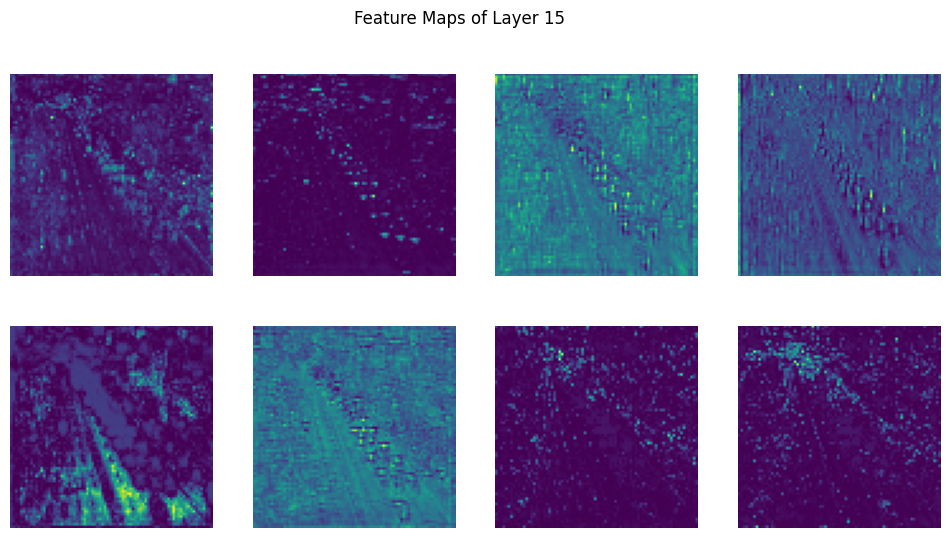

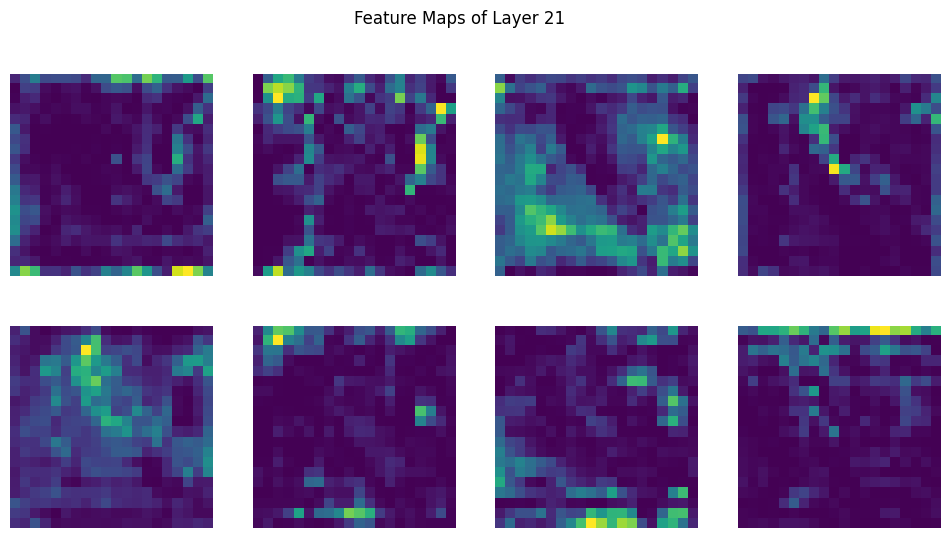

In [64]:
unique_image_path = ['/content/0000142_03658_d_0000041.jpg']

# Cargar la imagen y convertirla en tensor
image_tensor = load_image_as_tensor(unique_image_path[0])

# Capas que quieres visualizar
layer_ids = [1, 5, 6, 10, 15, 21] # no va a funcionar con la capa 22 por sus ultimos componentes

# Visualizar los feature maps
visualize_feature_maps(model, layer_ids, image_tensor)